In [2]:
#Now we gonna use this thbing to identify alphabets, cuz why fucking not? Lol
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [3]:
#get data
df=keras.datasets.mnist.load_data()
(train_data, train_target), (test_data, test_target)= df                                            # 50|50 split
imgsize=train_data[0].shape

train_data=train_data/255
test_data=test_data/255

ANN=keras.Sequential([keras.layers.Flatten(input_shape=imgsize),
                     keras.layers.Dense(512, activation="relu"),
                     keras.layers.Dense(256, activation="relu"),
                     keras.layers.Dense(np.unique(train_target).size, activation="sigmoid")])
ANN.output_shape
ANN.compile(metrics="accuracy", loss="sparse_categorical_crossentropy")
ANN.fit(train_data, train_target, epochs=20)


Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1885 - accuracy: 0.9429
Epoch 2/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0850 - accuracy: 0.9760
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0632 - accuracy: 0.9826
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0480 - accuracy: 0.9862
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0383 - accuracy: 0.9894
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0318 - accuracy: 0.9916
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0257 - accuracy: 0.9932
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0219 - accuracy: 0.9938
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0174 - accuracy: 0.9955
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.01

In [16]:
ANN.evaluate(test_data, test_target)
predicted=ANN.predict(test_data)
predictedargmax=[i.argmax() for i in predicted]

313/313 [==============================] - 1s 4ms/step


0.97


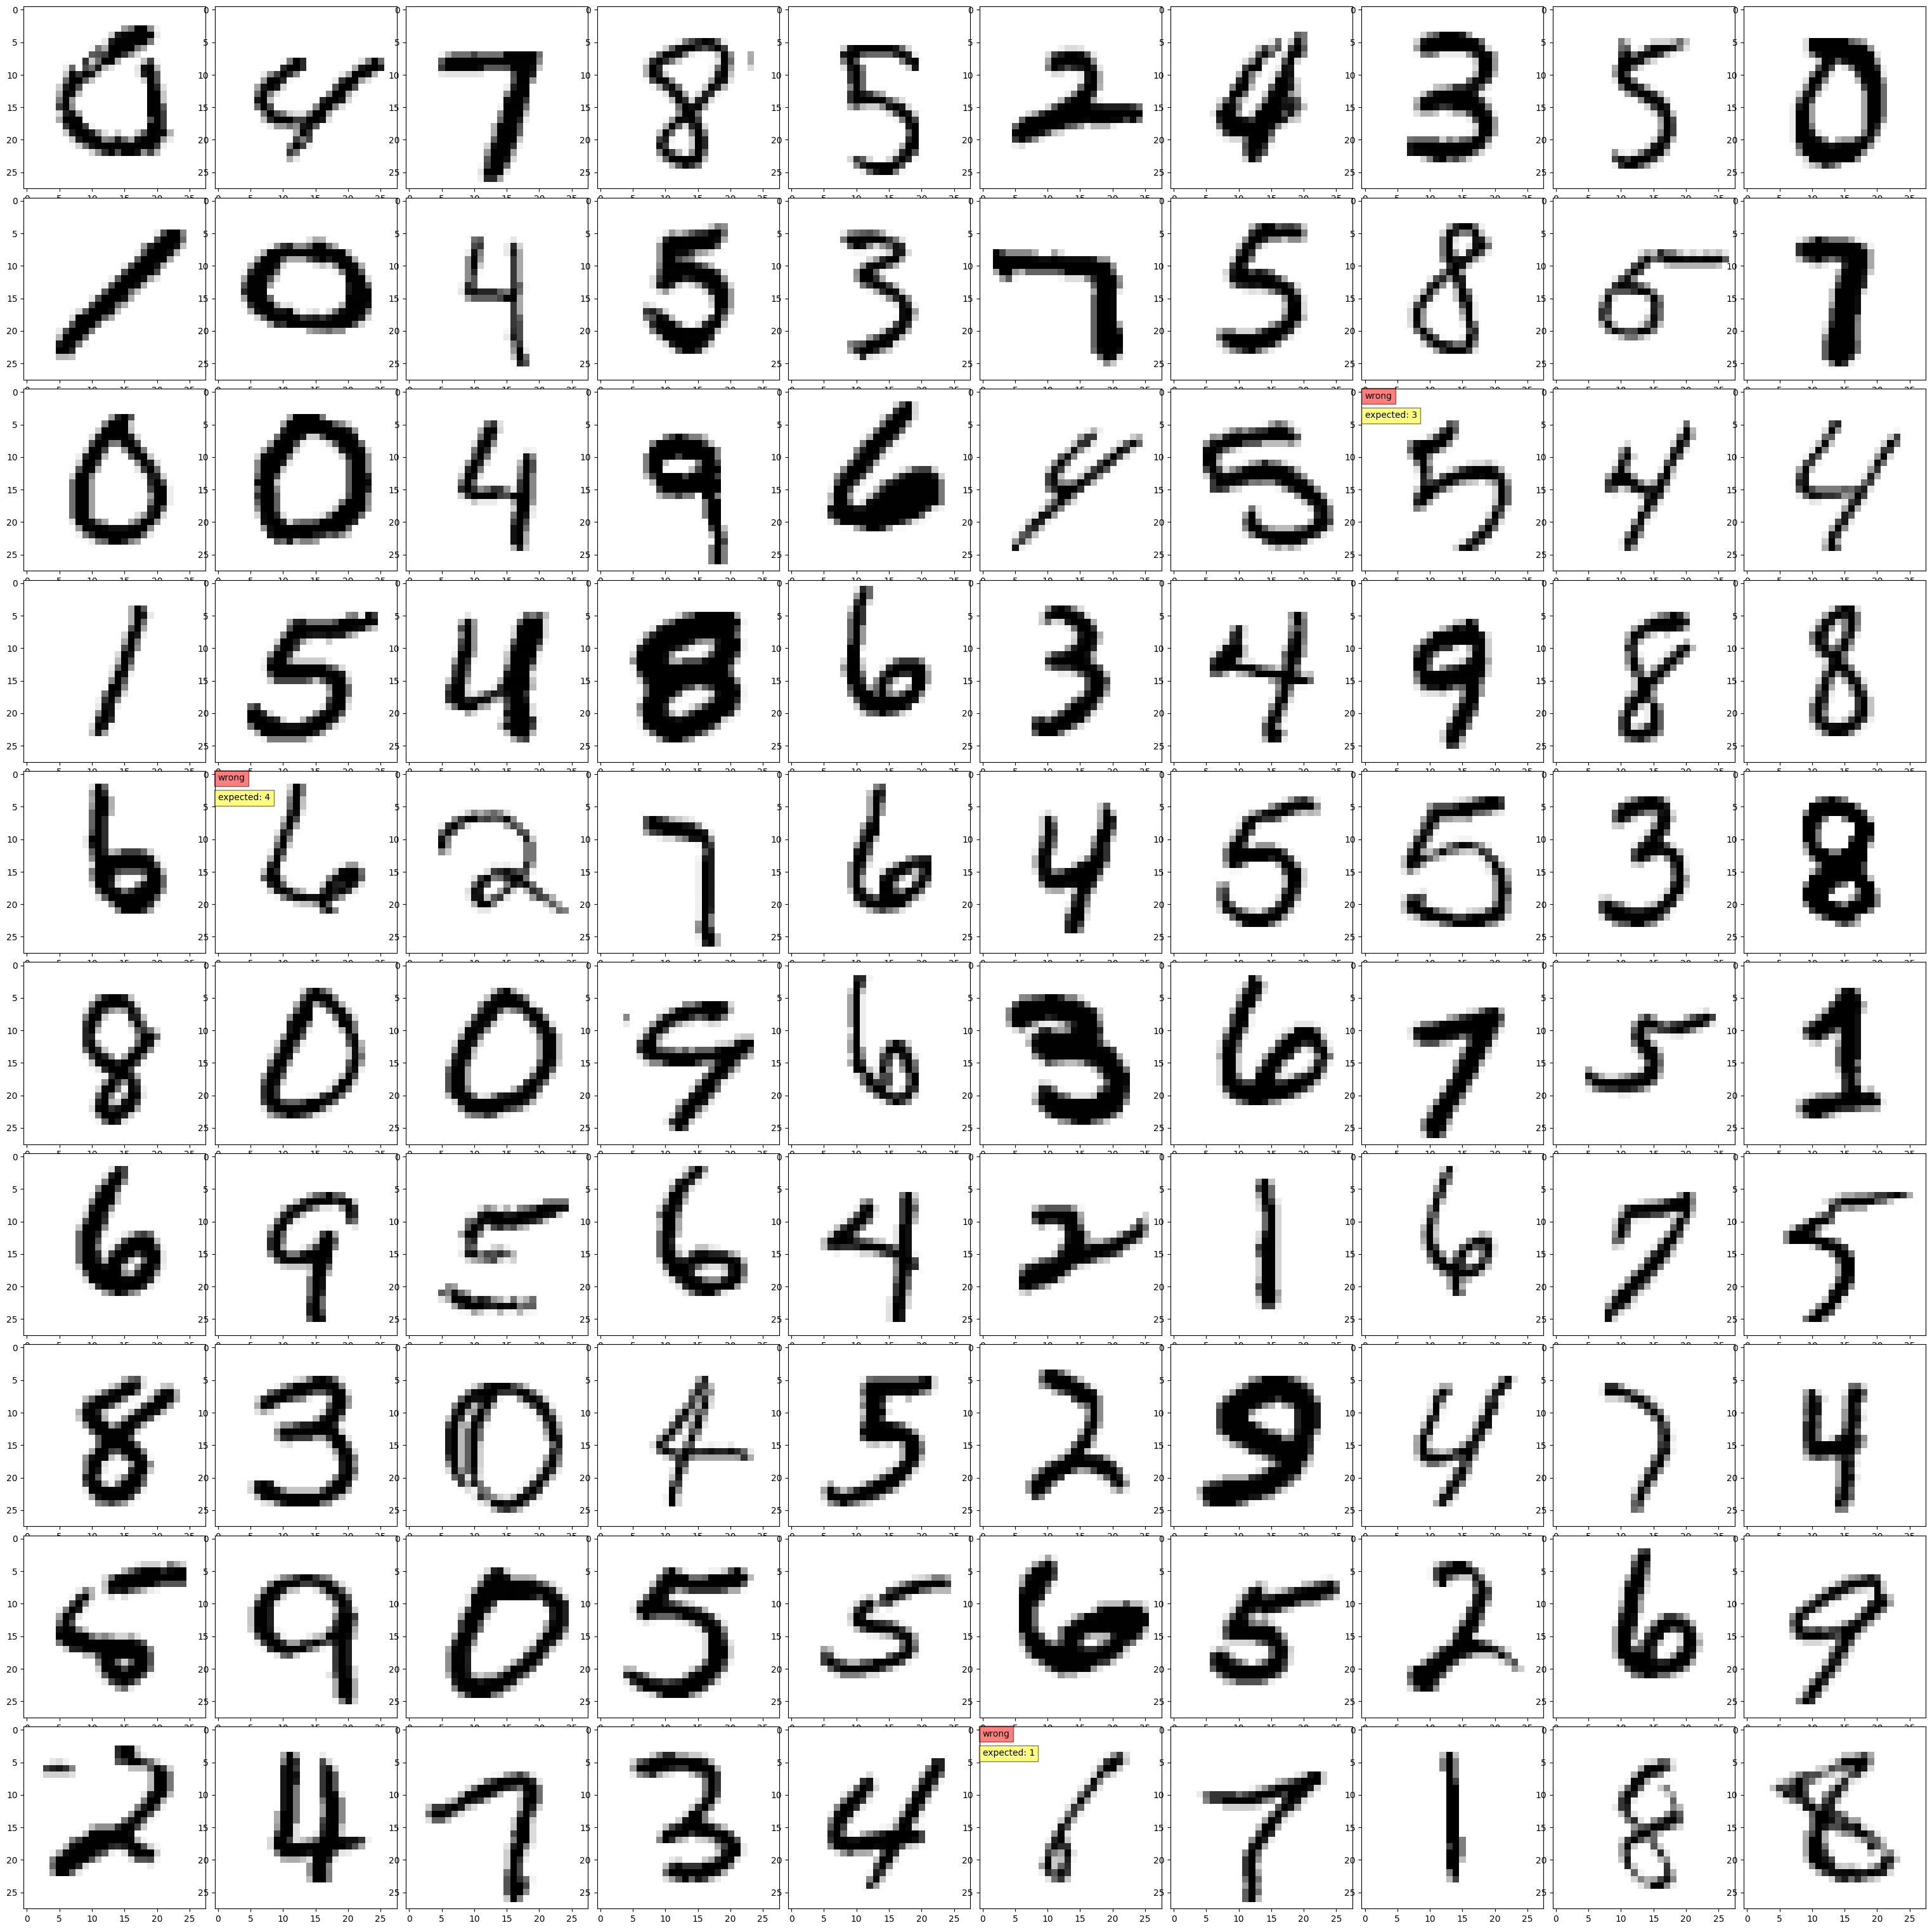

In [15]:
import random as rd
from sklearn.metrics import accuracy_score

fig = plt.figure(figsize=(30,30))
fig.subplots_adjust(0,0,1,1,0.05,0.05)

randint=[]
for i in range(100):
    randint.append(rd.randint(0,len(test_data)))
    ax=fig.add_subplot(10, 10, i+1)
    ax.imshow(test_data[randint[i]], cmap="binary")
    if(test_target[randint[i]]!=predictedargmax[randint[i]]):
        ax.text(0, 1, "wrong", bbox=dict(facecolor='red', alpha=0.5))
        ax.text(0, 4, "expected: "+str(predictedargmax[randint[i]]), bbox=dict(facecolor='yellow', alpha=0.5))
        
print(accuracy_score(test_target[randint], np.array(predictedargmax)[randint]))